In [11]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

In [21]:
#read observation data
dp = pd.read_csv('M92_fits.csv', dtype=np.float64)
y = dp['V'].values[:140000]
x = dp['VI'].values[:140000]*16
signal = dp['signal'].values[:140000]
noise = dp['noise'].values[:140000]

Bin-accretion...
1  /  723
2  /  723
3  /  723
4  /  723
5  /  723
6  /  723
7  /  723
8  /  723
9  /  723
10  /  723
11  /  723
12  /  723
13  /  723
14  /  723
15  /  723
16  /  723
17  /  723
18  /  723
19  /  723
20  /  723
21  /  723
22  /  723
23  /  723
24  /  723
25  /  723
26  /  723
27  /  723
28  /  723
29  /  723
30  /  723
31  /  723
32  /  723
33  /  723
34  /  723
35  /  723
36  /  723
37  /  723
38  /  723
39  /  723
40  /  723
41  /  723
42  /  723
43  /  723
44  /  723
45  /  723
46  /  723
47  /  723
48  /  723
49  /  723
50  /  723
51  /  723
52  /  723
53  /  723
54  /  723
55  /  723
56  /  723
57  /  723
58  /  723
59  /  723
60  /  723
61  /  723
62  /  723
63  /  723
64  /  723
65  /  723
66  /  723
67  /  723
68  /  723
69  /  723
70  /  723
71  /  723
72  /  723
73  /  723
74  /  723
75  /  723
76  /  723
77  /  723
78  /  723
79  /  723
80  /  723
81  /  723
82  /  723
83  /  723
84  /  723
85  /  723
86  /  723
87  /  723
88  /  723
89  /  723
90  /  723
91

698  /  723
699  /  723
700  /  723
701  /  723
702  /  723
703  /  723
704  /  723
705  /  723
706  /  723
707  /  723
708  /  723
709  /  723
710  /  723
711  /  723
712  /  723
713  /  723
714  /  723
715  /  723
716  /  723
717  /  723
718  /  723
719  /  723
720  /  723
721  /  723
722  /  723
723  /  723
723  initial bins.
Reassign bad bins...
722  good bins.
Modified Lloyd algorithm...
Iter:    1  Diff: 0.4691
Iter:    2  Diff: 0.3078
Iter:    3  Diff: 0.2124
Iter:    4  Diff: 0.2492
Iter:    5  Diff: 0.1425
Iter:    6  Diff: 0.1181
Iter:    7  Diff: 0.1257
Iter:    8  Diff: 0.09611
7  iterations.
Unbinned pixels:  0  /  18077
Fractional S/N scatter (%): 16.548478187751385
Elapsed time accretion: 4.82 seconds
Elapsed time optimization: 3.07 seconds


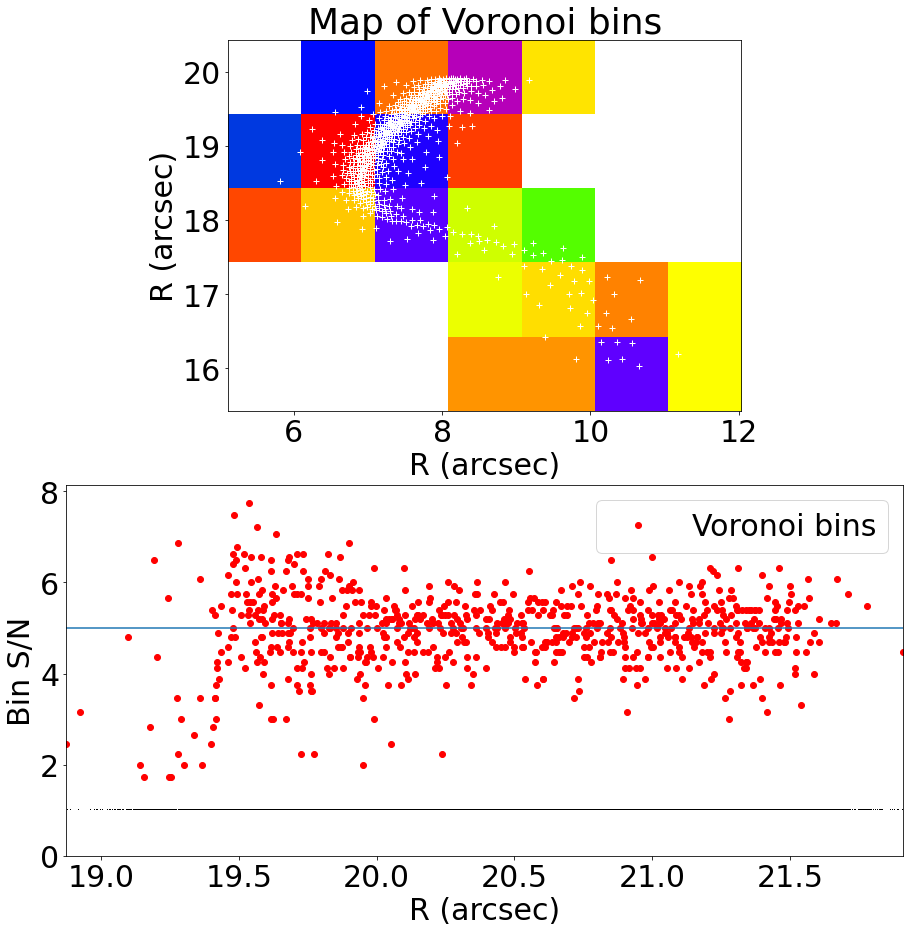

In [23]:
#Do vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=0)

In [27]:
np.savetxt('voronoi_2d_binning_result_SN5.txt', np.column_stack([x/16, y, binNum]),
               fmt=b'%10.6f %10.6f %8i')
np.savetxt('voronoi_2d_binning_centroid_SN5.txt', np.column_stack([xBar/16, yBar]),
               fmt=b'%10.6f %10.6f')

In [45]:
#read vorbin data
dp = pd.read_csv('voronoi_2d_binning_centroid_SN5.txt', sep ='\s+',names = ['xBar', 'yBar'])
xBar = dp['xBar'].values()*16
yBar = dp['yBar'].values()
points=dp[['xBar', 'yBar']].to_numpy()
points[:,0] = points[:,0]
points

TypeError: 'numpy.ndarray' object is not callable

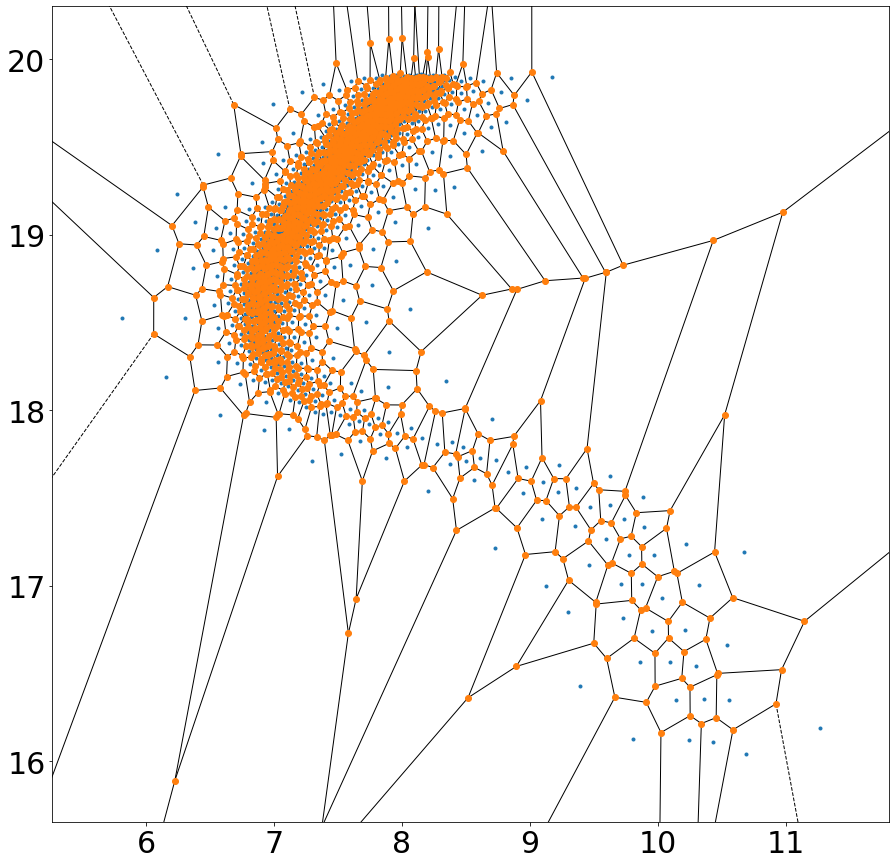

In [46]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [47]:
#define search
def search_point_location(x, y, xBar, yBar):
    delta_x = [xbar - x for xbar in xBar]
    delta_y = [ybar - y for ybar in yBar]
    distance = (np.square(delta_x) + np.square(delta_y)).tolist()
    min_value = min(distance)
    bin_num = distance.index(min_value)
    return bin_num

In [48]:
#read test data
dp = pd.read_csv('mc10000.a09000',sep='\s+',names=['vi','v'],skiprows=3)
dp

,vi,v
0,0.482090,5.110309
1,0.513806,5.310567
2,0.438550,4.489753
3,0.379903,3.961993
4,0.410069,3.855842
...,...,...
2441411,0.430296,4.644538
2441412,0.704881,1.089135
2441413,0.357635,3.698242
2441414,0.353714,3.706164


In [50]:
import time

In [63]:
bin_count = np.zeros(len(xBar))
start_time = time.time()
for i in range(len(dp)):
    bin_num = search_point_location(dp['vi'][i]*16, dp['v'][i], xBar, yBar)
#    dp['binnum'][i] = bin_num
    bin_count[bin_num+1] += 1
end_time = time.time()
print(end_time - start_time)

821.0535416603088


In [62]:
bin_count[0]

0.0

In [64]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

(15.943447, 20.014588)

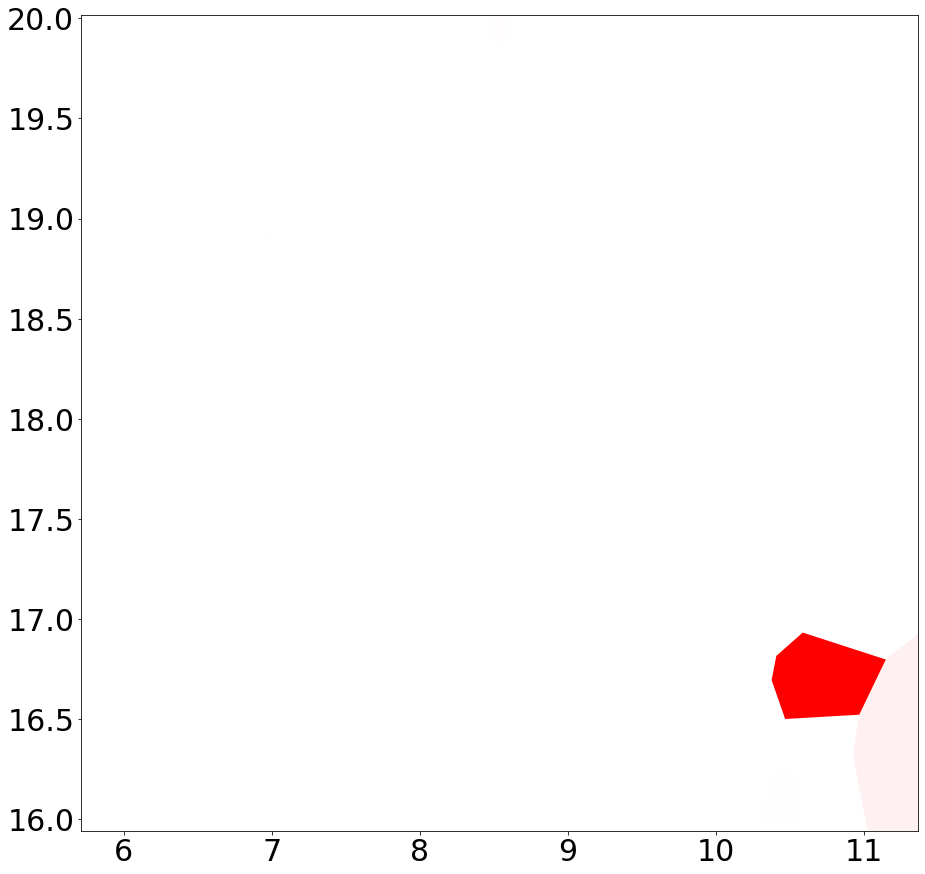

In [76]:
regions, vertices = voronoi_finite_polygons_2d(vor)
# colorize
for i in range(len(regions)):
#for region in regions:
    polygon = vertices[regions[i]]
    plt.fill(*zip(*polygon), 'r', alpha = bin_count[i]/max(bin_count))

#plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

#plt.show()

In [77]:
bin_count

array([0.000000e+00, 1.268910e+05, 1.173200e+04, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.277057e+06, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.700000e+02, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

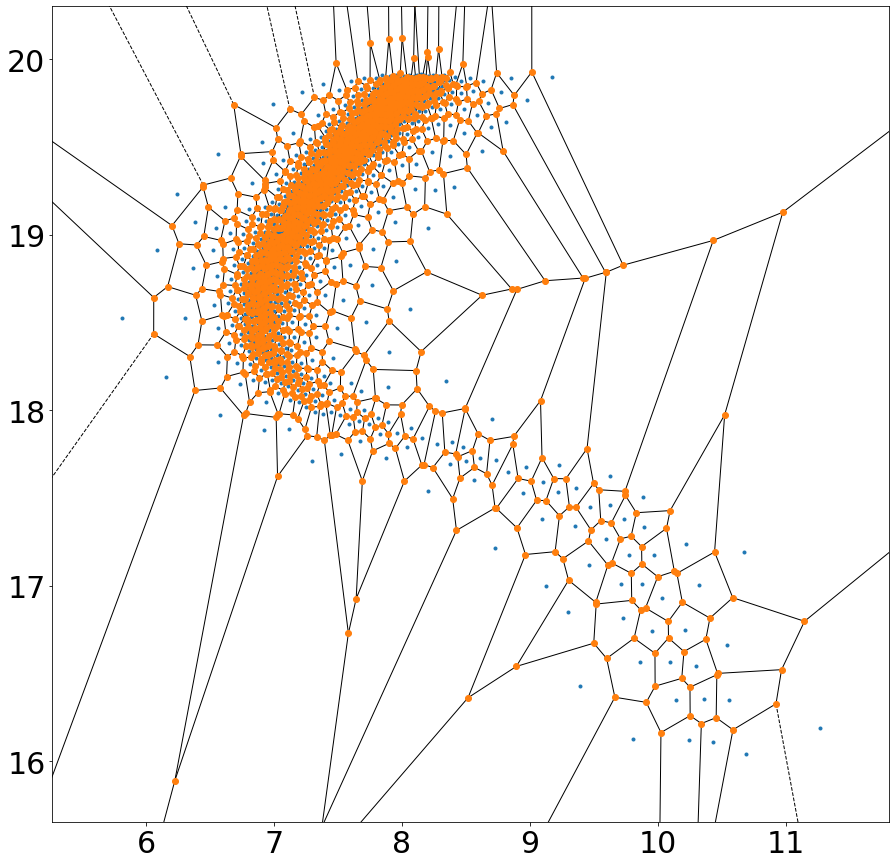

In [84]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.scatter(x,y,c='r')
plt.show()

In [85]:
y

array([5.11030912, 5.31056738, 4.48975325, ..., 3.69824243, 3.70616412,
       4.36972141])